<a href="https://colab.research.google.com/github/Abhijitdutta08/datascience_projects/blob/main/GrangerCausality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
import os
os.chdir("/content/drive/My Drive")

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
df= pd.read_csv('/content/drive/MyDrive/Difference in diff/chicken_egg.csv')

In [9]:
df

,chicken,egg
0,468491,3581
1,449743,3532
2,436815,3327
3,444523,3255
4,433937,3156
5,389958,3081
6,403446,3166
7,423921,3443
8,389624,3424
9,418591,3561


In [18]:
egg=df.loc[:,'egg']
egg

0     3581
1     3532
2     3327
3     3255
4     3156
5     3081
6     3166
7     3443
8     3424
9     3561
10    3640
11    3840
12    4456
13    5000
14    5366
15    5154
16    5130
17    5077
18    5032
19    5148
20    5404
21    5322
22    5323
23    5307
24    5402
25    5407
26    5500
27    5442
28    5442
29    5542
30    5339
31    5358
32    5403
33    5345
34    5435
35    5474
36    5540
37    5836
38    5777
39    5629
40    5704
41    5806
42    5742
43    5502
44    5461
45    5382
46    5377
47    5408
48    5608
49    5777
50    5825
51    5625
52    5800
53    5656
Name: egg, dtype: int64

In [19]:
chickens= df.loc[:,'chicken']
chickens

0     468491
1     449743
2     436815
3     444523
4     433937
5     389958
6     403446
7     423921
8     389624
9     418591
10    438288
11    422841
12    476935
13    542047
14    582197
15    516497
16    523227
17    467217
18    499644
19    430876
20    456549
21    430988
22    426555
23    398156
24    396776
25    390708
26    383690
27    391363
28    374281
29    387002
30    369484
31    366082
32    377392
33    375575
34    382262
35    394118
36    393019
37    428746
38    425158
39    422096
40    433280
41    421763
42    404191
43    408769
44    394101
45    379754
46    378361
47    386518
48    396933
49    400585
50    392110
51    384838
52    378609
53    364584
Name: chicken, dtype: int64

<Axes: xlabel='Time', ylabel='Mean'>

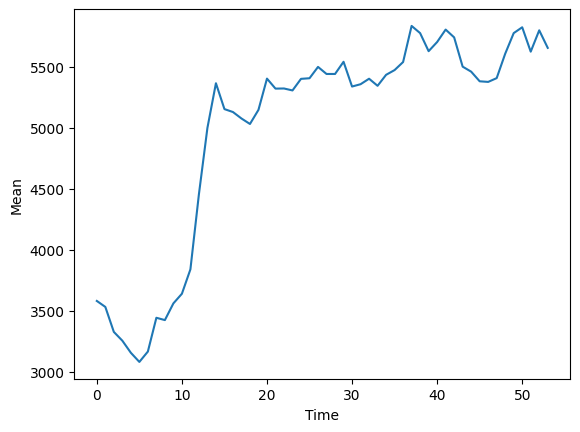

In [23]:
egg.plot(xlabel= "Time",
         ylabel= "Mean")

<Axes: xlabel='Time', ylabel='Mean'>

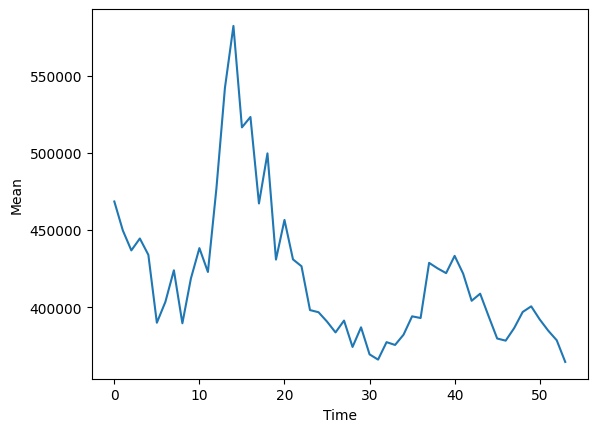

In [26]:
chickens.plot(xlabel= "Time",
         ylabel= "Mean")

In [29]:
from statsmodels.tsa.stattools import adfuller
stationarity_eggs= adfuller(egg)
stationarity_eggs
print('p-value:', stationarity_eggs[1])

p-value: 0.4231858463747657


In [30]:
stationarity_chickens= adfuller(chickens)
stationarity_chickens
print('p-value:', stationarity_chickens[1])

p-value: 0.3004953142442696


Making data stationary

In [32]:
deggs= egg-egg.shift(1)
deggs

0       NaN
1     -49.0
2    -205.0
3     -72.0
4     -99.0
5     -75.0
6      85.0
7     277.0
8     -19.0
9     137.0
10     79.0
11    200.0
12    616.0
13    544.0
14    366.0
15   -212.0
16    -24.0
17    -53.0
18    -45.0
19    116.0
20    256.0
21    -82.0
22      1.0
23    -16.0
24     95.0
25      5.0
26     93.0
27    -58.0
28      0.0
29    100.0
30   -203.0
31     19.0
32     45.0
33    -58.0
34     90.0
35     39.0
36     66.0
37    296.0
38    -59.0
39   -148.0
40     75.0
41    102.0
42    -64.0
43   -240.0
44    -41.0
45    -79.0
46     -5.0
47     31.0
48    200.0
49    169.0
50     48.0
51   -200.0
52    175.0
53   -144.0
Name: egg, dtype: float64

In [34]:
deggs= deggs.dropna()
deggs

1     -49.0
2    -205.0
3     -72.0
4     -99.0
5     -75.0
6      85.0
7     277.0
8     -19.0
9     137.0
10     79.0
11    200.0
12    616.0
13    544.0
14    366.0
15   -212.0
16    -24.0
17    -53.0
18    -45.0
19    116.0
20    256.0
21    -82.0
22      1.0
23    -16.0
24     95.0
25      5.0
26     93.0
27    -58.0
28      0.0
29    100.0
30   -203.0
31     19.0
32     45.0
33    -58.0
34     90.0
35     39.0
36     66.0
37    296.0
38    -59.0
39   -148.0
40     75.0
41    102.0
42    -64.0
43   -240.0
44    -41.0
45    -79.0
46     -5.0
47     31.0
48    200.0
49    169.0
50     48.0
51   -200.0
52    175.0
53   -144.0
Name: egg, dtype: float64

In [40]:
dchickens= chickens-chickens.shift(1)
dchickens

0         NaN
1    -18748.0
2    -12928.0
3      7708.0
4    -10586.0
5    -43979.0
6     13488.0
7     20475.0
8    -34297.0
9     28967.0
10    19697.0
11   -15447.0
12    54094.0
13    65112.0
14    40150.0
15   -65700.0
16     6730.0
17   -56010.0
18    32427.0
19   -68768.0
20    25673.0
21   -25561.0
22    -4433.0
23   -28399.0
24    -1380.0
25    -6068.0
26    -7018.0
27     7673.0
28   -17082.0
29    12721.0
30   -17518.0
31    -3402.0
32    11310.0
33    -1817.0
34     6687.0
35    11856.0
36    -1099.0
37    35727.0
38    -3588.0
39    -3062.0
40    11184.0
41   -11517.0
42   -17572.0
43     4578.0
44   -14668.0
45   -14347.0
46    -1393.0
47     8157.0
48    10415.0
49     3652.0
50    -8475.0
51    -7272.0
52    -6229.0
53   -14025.0
Name: chicken, dtype: float64

In [41]:
dchickens= dchickens.dropna()

In [43]:
stationarity_deggs= adfuller(deggs)
print('p-value:', stationarity_deggs[1])

p-value: 6.743493214656537e-05


In [42]:
stationarity_dchickens= adfuller(dchickens)
print('p-value:', stationarity_dchickens[1])

p-value: 0.0031683024984550446


In [45]:
deggs= pd.DataFrame(deggs)
deggs

,egg
1,-49.0
2,-205.0
3,-72.0
4,-99.0
5,-75.0
6,85.0
7,277.0
8,-19.0
9,137.0
10,79.0


In [46]:
dchickens= pd.DataFrame(dchickens)
dchickens


,chicken
1,-18748.0
2,-12928.0
3,7708.0
4,-10586.0
5,-43979.0
6,13488.0
7,20475.0
8,-34297.0
9,28967.0
10,19697.0


In [48]:
#creating two dataframes
df_chickens= pd.concat([dchickens, deggs],axis=1)
df_chickens

,chicken,egg
1,-18748.0,-49.0
2,-12928.0,-205.0
3,7708.0,-72.0
4,-10586.0,-99.0
5,-43979.0,-75.0
6,13488.0,85.0
7,20475.0,277.0
8,-34297.0,-19.0
9,28967.0,137.0
10,19697.0,79.0


In [50]:
df_eggs= pd.concat([deggs, dchickens], axis=1)
df_eggs

,egg,chicken
1,-49.0,-18748.0
2,-205.0,-12928.0
3,-72.0,7708.0
4,-99.0,-10586.0
5,-75.0,-43979.0
6,85.0,13488.0
7,277.0,20475.0
8,-19.0,-34297.0
9,137.0,28967.0
10,79.0,19697.0


Granger Causality Test

In [51]:
from statsmodels.tsa.stattools import grangercausalitytests

In [52]:
granger_chicken= grangercausalitytests(df_chickens, 15)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.3694 , p=0.0023  , df_denom=49, df_num=1
ssr based chi2 test:   chi2=11.0043 , p=0.0009  , df=1
likelihood ratio test: chi2=9.9819  , p=0.0016  , df=1
parameter F test:         F=10.3694 , p=0.0023  , df_denom=49, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.9196  , p=0.0268  , df_denom=46, df_num=2
ssr based chi2 test:   chi2=8.6913  , p=0.0130  , df=2
likelihood ratio test: chi2=8.0254  , p=0.0181  , df=2
parameter F test:         F=3.9196  , p=0.0268  , df_denom=46, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.9318  , p=0.0441  , df_denom=43, df_num=3
ssr based chi2 test:   chi2=10.2270 , p=0.0167  , df=3
likelihood ratio test: chi2=9.3049  , p=0.0255  , df=3
parameter F test:         F=2.9318  , p=0.0441  , df_denom=43, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.1762  , p=0.0064  , df_d

In [53]:
granger_eggs= grangercausalitytests(df_eggs, 15)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5434  , p=0.4646  , df_denom=49, df_num=1
ssr based chi2 test:   chi2=0.5766  , p=0.4476  , df=1
likelihood ratio test: chi2=0.5734  , p=0.4489  , df=1
parameter F test:         F=0.5434  , p=0.4646  , df_denom=49, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3865  , p=0.6816  , df_denom=46, df_num=2
ssr based chi2 test:   chi2=0.8571  , p=0.6515  , df=2
likelihood ratio test: chi2=0.8500  , p=0.6538  , df=2
parameter F test:         F=0.3865  , p=0.6816  , df_denom=46, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2245  , p=0.8788  , df_denom=43, df_num=3
ssr based chi2 test:   chi2=0.7833  , p=0.8535  , df=3
likelihood ratio test: chi2=0.7772  , p=0.8549  , df=3
parameter F test:         F=0.2245  , p=0.8788  , df_denom=43, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2817  , p=0.8881  , df_d